<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statistics

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
states = pd.read_csv("../data/states_edu.csv")
print(states)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
print(states.AVG_MATH_4_SCORE)

0       208.0
1         NaN
2       215.0
3       210.0
4       208.0
        ...  
1710    247.0
1711    240.0
1712    231.0
1713    242.0
1714    246.0
Name: AVG_MATH_4_SCORE, Length: 1715, dtype: float64


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **FEDERAL_REVENUE**


Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [4]:
states.index = states["STATE"]
print(states.YEAR.unique().size)
#print(states.loc["1992_ALABAMA"])

33


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [5]:
print("The mean math 4 score for students in Michigan across all years is " +str(states.loc["MICHIGAN"].AVG_MATH_4_SCORE.mean()))
print("The mean math 4 score for students in Ohio across all years is " +str(states.loc["OHIO"].AVG_MATH_4_SCORE.mean()))
print("Ohio has an average score "+ str(states.loc["OHIO"].AVG_MATH_4_SCORE.mean()-states.loc["MICHIGAN"].AVG_MATH_4_SCORE.mean()) + " points higher than that of Michigan")

The mean math 4 score for students in Michigan across all years is 234.36363636363637
The mean math 4 score for students in Ohio across all years is 239.45454545454547
Ohio has an average score 5.0909090909090935 points higher than that of Michigan


Find the average for your pedictor score across all states in 2019

In [6]:
## As not enough reliable data exists for the year 2019, I will use the next most relevant year, 
#2016, to look for the average
uniqueStates = states.STATE.unique()
states.index = states["PRIMARY_KEY"]
scores2019 = []
baseStr= "2019_"
for x in uniqueStates:
    strState = str(x)
    if x == "DODEA":
        break
    #print(strState)
    scores2019.append(states.loc[baseStr+strState].AVG_MATH_4_SCORE)
print("The average math 4 score of a state in 2019 is: "+str(statistics.mean(scores2019)))


The average math 4 score of a state in 2019 is: 239.72549019607843


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [7]:
states1=states.copy()

In [8]:
states.index = states["STATE"]
maxScore=[]
count=0;
for x in uniqueStates:
    strState = str(x)
    if x == "DODEA":
        break
    maxScore.append(states.loc[strState].AVG_MATH_4_SCORE.max())
    print("The max math 4 avg score of the state of " + strState+" is: "+str(maxScore[count]))
    count=count+1
    

The max math 4 avg score of the state of ALABAMA is: 233.0
The max math 4 avg score of the state of ALASKA is: 237.0
The max math 4 avg score of the state of ARIZONA is: 240.0
The max math 4 avg score of the state of ARKANSAS is: 240.0
The max math 4 avg score of the state of CALIFORNIA is: 235.0
The max math 4 avg score of the state of COLORADO is: 247.0
The max math 4 avg score of the state of CONNECTICUT is: 245.0
The max math 4 avg score of the state of DELAWARE is: 243.0
The max math 4 avg score of the state of DISTRICT_OF_COLUMBIA is: 235.0
The max math 4 avg score of the state of FLORIDA is: 246.0
The max math 4 avg score of the state of GEORGIA is: 240.0
The max math 4 avg score of the state of HAWAII is: 243.0
The max math 4 avg score of the state of IDAHO is: 242.0
The max math 4 avg score of the state of ILLINOIS is: 239.0
The max math 4 avg score of the state of INDIANA is: 249.0
The max math 4 avg score of the state of IOWA is: 246.0
The max math 4 avg score of the state o

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [9]:
states2 = pd.read_csv("../data/states_edu.csv")

In [10]:
#Let's find the average percent of funding per state that comes from the federal government for each state

states2['%_FEDERAL_FUNDING']= states2['FEDERAL_REVENUE']/states2['TOTAL_REVENUE']*100

states2['DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12'] = (states2['GRADES_4_G']-states2['GRADES_12_G'])/states2['GRADES_ALL_G']

print(states2.shape)

(1715, 27)


Final feature list: 

**The Percent of Education funding that is Federal Funding**

**The Difference in Enrollments between Grades 4 and 12, normalized by that states total enrollment**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

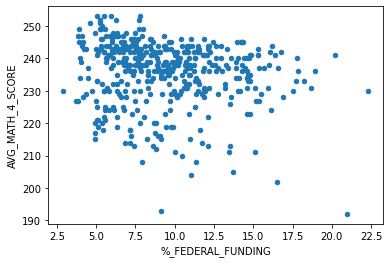

In [11]:
states2.plot.scatter(x='%_FEDERAL_FUNDING', y='AVG_MATH_4_SCORE')

**Correlation between the % of Federal funding and Average 4th Grade Math Score**

**Visualization 2**

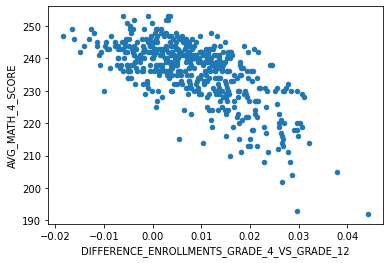

In [12]:
states2.plot.scatter(x='DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12', y='AVG_MATH_4_SCORE')

**Correlation between the Differeence in Grade 4 and 12 Enrollments Normalized by Total Enrollments and Average 4th Grade Math Score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
#states[['TOTAL_REVENUE', 'YEAR', '%_FEDERAL_FUNDING', 'DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12']].dropna().index.value_counts()

In [18]:
#states2['AVG_MATH_4_SCORE'].dropna()
states2.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
X = states2[['TOTAL_REVENUE', 'YEAR', '%_FEDERAL_FUNDING', 'DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12']].dropna()
y = states2.loc[X.index]['AVG_MATH_4_SCORE']

#print(X.shape)
#print(states2['AVG_MATH_4_SCORE'])
#print(y.shape)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **Linear Regression**

In [20]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [21]:
# create your model here
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [28]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
                         #cmap=plt.cm.Blues)

Text(0, 0.5, 'Average Math 4 Score')

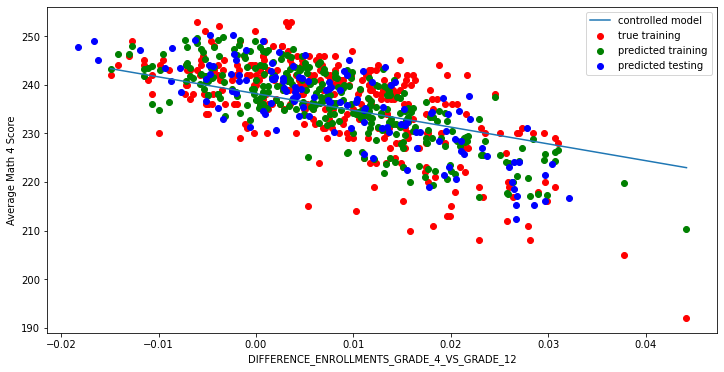

In [29]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 4 Score')

<h2> Summary </h2>

I used the variables TOTAL_REVENUE, YEAR, %_FEDERAL_FUNDING, and DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12 to predict AVG_MATH_4_SCORE. I created the features %_FEDERAL_FUNDING and DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12 using other data in the dataset which can be found above. I then mapped the linear regression of DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12 onto a graph with true training, predicted training, nad predicted testing and got a decent model. Overall, it seems the variable DIFFERENCE_ENROLLMENTS_GRADE_4_VS_GRADE_12 is a decent predictor of AVG_MATH_4_SCORE